# Fig2A: 各肺癌亚型细胞系 箱线图

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_data = pd.read_csv("../../data/LUNG_Filtered_barplot.csv")
# 按照Cell Lines排序
df_data = df_data.sort_values(by="OncotreeCode")
df_data.head()

,drug,cell_line,prediction,OncotreeCode,IC50
935,MG-132,NCIH1299,-1.539457,LCLC,-1.606815
957,PD0325901,NCIH1299,0.856339,LCLC,1.033009
958,PD173074,NCIH1299,4.499624,LCLC,4.027859
959,PFI-1,NCIH1299,4.143933,LCLC,3.485345
960,PFI3,NCIH1299,5.490832,LCLC,5.409631


In [3]:
# 计算每个cell_line，prediction列和IC50列的皮尔逊相关系数和R2，保存到一个dataframe中，再加上对应的cell_line和OncotreeCode
df_data = df_data.groupby(["cell_line","OncotreeCode"]).apply(lambda x: pd.Series({
    "Pearson":x["prediction"].corr(x["IC50"],method="pearson"),
    "R2":x["prediction"].corr(x["IC50"],method="spearman")**2,
    'RMSE':((x["prediction"]-x["IC50"])**2).mean()**0.5,
})).reset_index()
#根据OncotreeCode排序
df_data = df_data.sort_values(by="OncotreeCode")
df_data.head()

C:\Users\query\AppData\Local\Temp\ipykernel_5692\3932644770.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_data = df_data.groupby(["cell_line","OncotreeCode"]).apply(lambda x: pd.Series({


,cell_line,OncotreeCode,Pearson,R2,RMSE
2,LCLC103H,LCLC,0.935925,0.766724,0.855401
4,NCIH1299,LCLC,0.941215,0.745222,0.856599
1,HCC827,LUAD,0.836816,0.690785,1.510264
9,NCIH2228,LUAD,0.930564,0.774042,0.993341
11,PC14,LUAD,0.891531,0.806683,1.543504


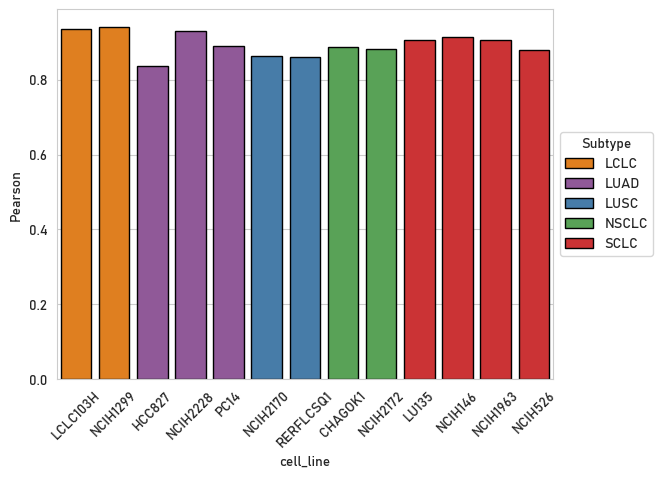

In [5]:
# 画barplot，x轴cell_line，y轴Pearson，颜色按照OncotreeCode分类

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 设置颜色方案
# palette = sns.color_palette("muted", 5)
# 'LUAD','LCLC','NSCLC','LUSC','SCLC'
palette = {'LUAD':'#b9f2f0', 
           'LCLC':'#d0bbff', 
           'NSCLC':'#ff9f9b',
           'LUSC':'#66c2a5',
           'SCLC':'#a6d854'}
# palette = {'LUAD':'#984EA3', 
#            'LCLC':'#FF7F00', 
#            'NSCLC':'#4DAF4A',
#            'LUSC':'#377EB8',
#            'SCLC':'#E41A1C'}
bar_plot = sns.barplot(x="cell_line",y="Pearson",hue="OncotreeCode",data=df_data,palette=palette,edgecolor='black')
# 设置x轴标签倾斜45度
plt.xticks(rotation=45)
bar_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Subtype')

# plt.savefig("Fig2A.png",dpi=300,bbox_inches='tight')
plt.show()


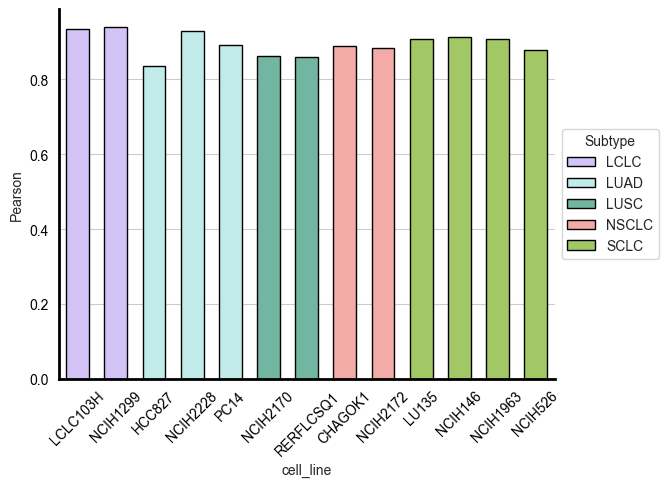

In [34]:
# Set the style of seaborn plot to white background
sns.set_style("whitegrid")

palette = {'LUAD':'#b9f2f0', 'LCLC':'#d0bbff', 'NSCLC':'#ff9f9b', 'LUSC':'#66c2a5', 'SCLC':'#a6d854'}
bar_plot = sns.barplot(x="cell_line",y="Pearson",hue="OncotreeCode",data=df_data,palette=palette,edgecolor='black',width=0.6)

# Get the current axes, creating one if necessary.
ax = plt.gca()

# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽
# X轴颜色为黑色
ax.spines['bottom'].set_color('black')
# Y轴颜色为黑色
ax.spines['left'].set_color('black')
# X轴加上刻度
ax.tick_params(axis='x', colors='black')
# Y轴加上刻度
ax.tick_params(axis='y', colors='black')

plt.xticks(rotation=45)
bar_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Subtype')

plt.show()

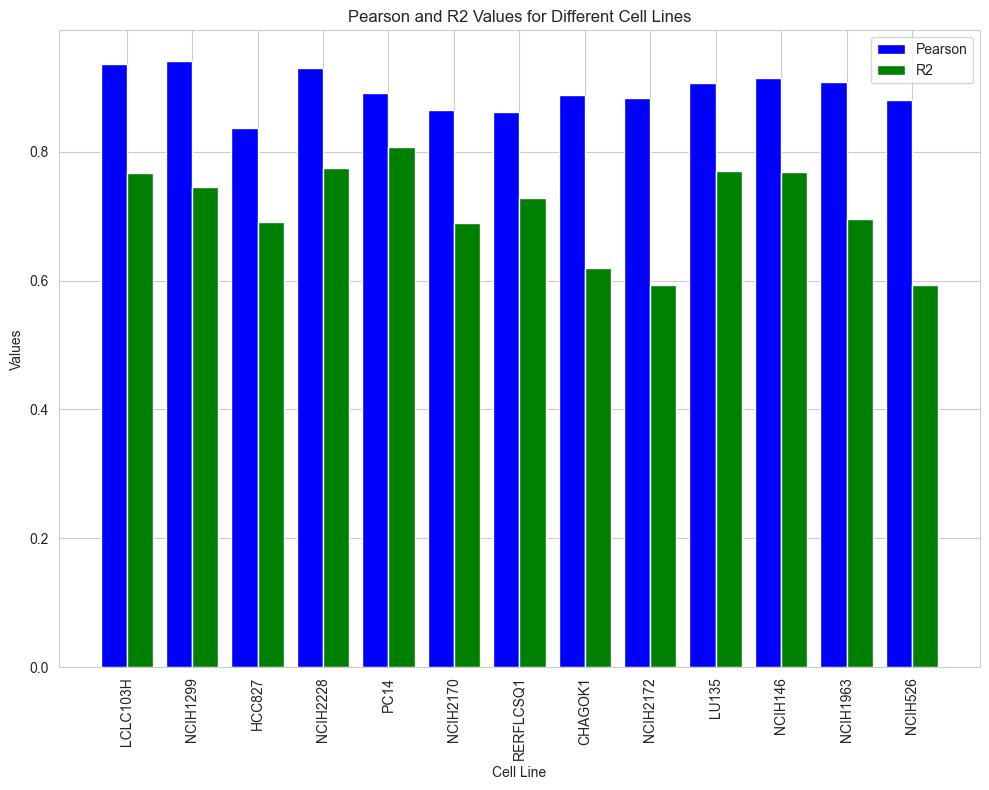

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the size of the figure
plt.figure(figsize=(10,8))

# Set the positions and width for the bars
positions = range(len(df_data['cell_line']))
bar_width = 0.4

# Plotting both Pearson and R2 values
plt.bar(positions, df_data['Pearson'], width=bar_width, label='Pearson', color='blue', align='center')
plt.bar([p + bar_width for p in positions], df_data['R2'], width=bar_width, label='R2', color='green', align='center')

# Adding the cell line names as labels on the x-axis
plt.xticks([p + bar_width/2 for p in positions], df_data['cell_line'], rotation=90)

# Adding the legend and titles
plt.ylabel('Values')
plt.xlabel('Cell Line')
plt.title('Pearson and R2 Values for Different Cell Lines')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


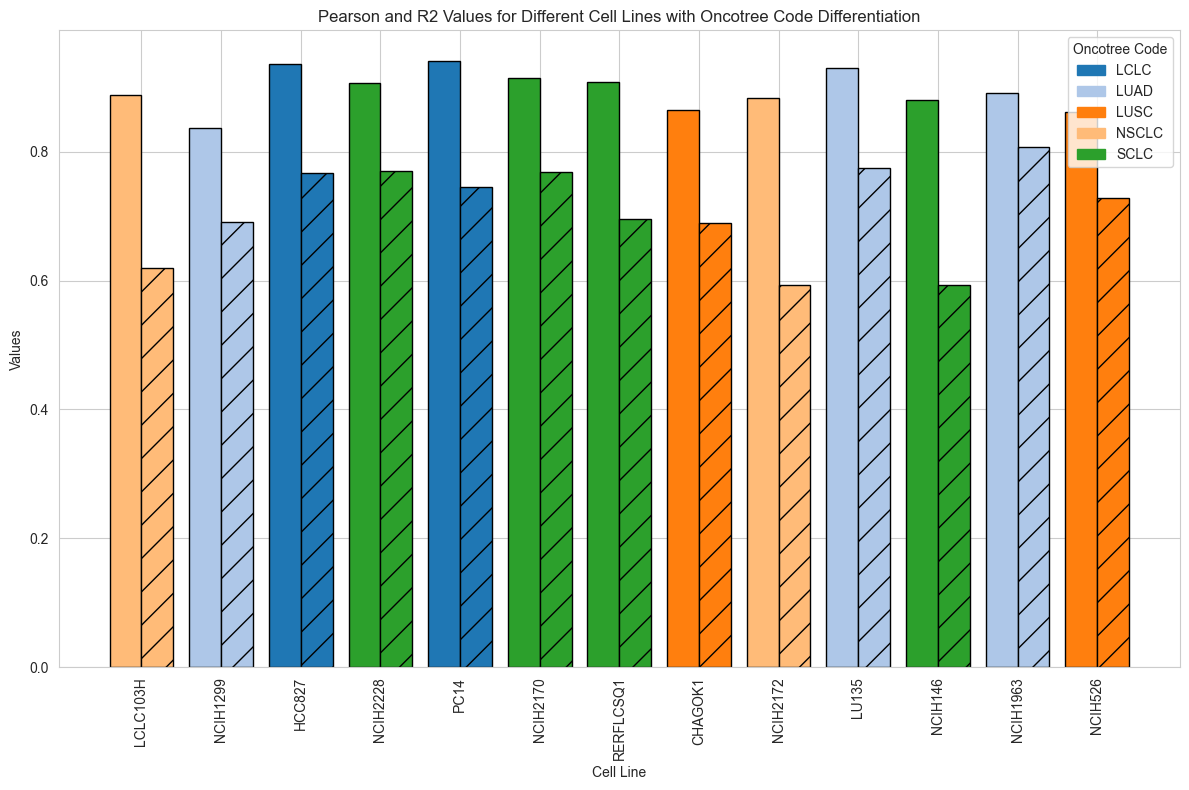

In [22]:
# We will use a color map to differentiate the OncotreeCode in the bar chart
colors = plt.cm.tab20.colors
oncotree_color_map = {code: colors[i] for i, code in enumerate(df_data['OncotreeCode'].unique())}

# Create new bar positions to offset each bar for clarity
bar_positions_1 = [pos - bar_width/2 for pos in positions]
bar_positions_2 = [pos + bar_width/2 for pos in positions]

# Create the figure and axes
plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Plot the Pearson and R2 values with colors based on the OncotreeCode
for i in range(len(df_data)):
    ax.bar(bar_positions_1[i], df_data['Pearson'][i], width=bar_width, color=oncotree_color_map[df_data['OncotreeCode'][i]], edgecolor='black')
    ax.bar(bar_positions_2[i], df_data['R2'][i], width=bar_width, color=oncotree_color_map[df_data['OncotreeCode'][i]], edgecolor='black', hatch='/')

# Create legend handles manually
handles = [plt.Rectangle((0,0),1,1, color=oncotree_color_map[code]) for code in oncotree_color_map]
labels = list(oncotree_color_map.keys())

# Add the legend to the plot
ax.legend(handles, labels, title='Oncotree Code')

# Set the x-ticks to be in the middle of the two bars
ax.set_xticks([p for p in positions])
ax.set_xticklabels(df_data['cell_line'], rotation=90)

# Set labels and title
plt.ylabel('Values')
plt.xlabel('Cell Line')
plt.title('Pearson and R2 Values for Different Cell Lines with Oncotree Code Differentiation')

# Show the plot
plt.tight_layout()
plt.show()